In [2]:
# A)
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

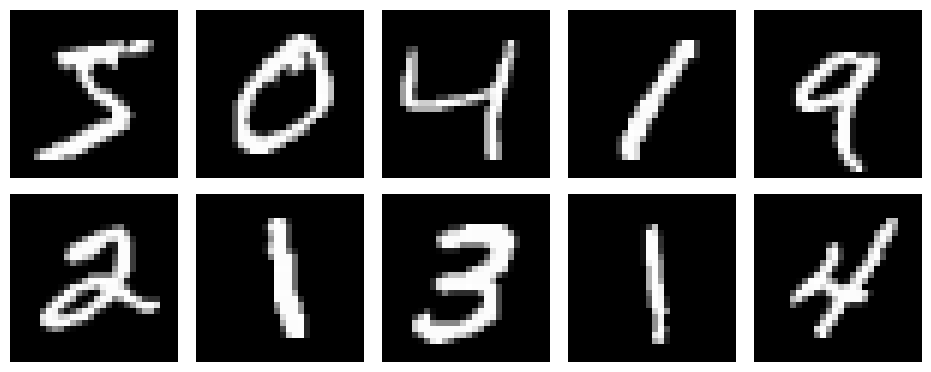

In [ ]:
import matplotlib.pyplot as plt

def display_images(data, nrows = 2, ncols = 5, figsize = (12,4)):
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap = "gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)

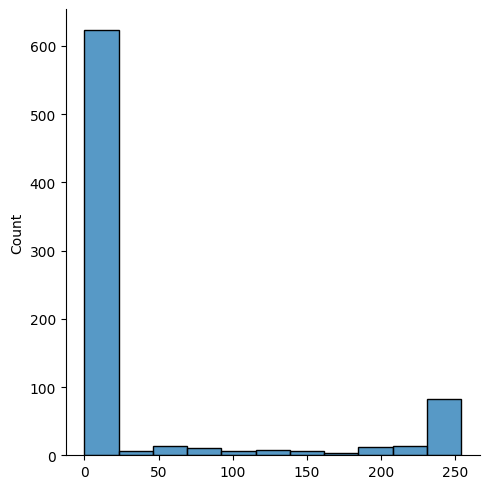

In [5]:
import seaborn as sns

sns.displot(data=X_train[5000, :, :].reshape(-1), kind="hist", legend=True)

In [6]:
# B)
print(X_train.min(), X_train.max())
X_train = X_train.astype(("float32")) / 255
X_test = X_test.astype("float32") / 255

print(X_train.min(), X_train.max())

0 255
0.0 1.0


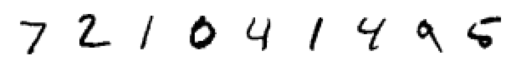

In [7]:
# C
fig, axes = plt.subplots(1,9)

for ax, digit in zip(axes, X_test[:9]):
    ax.set_axis_off()
    ax.imshow(digit, cmap=plt.cm.binary)

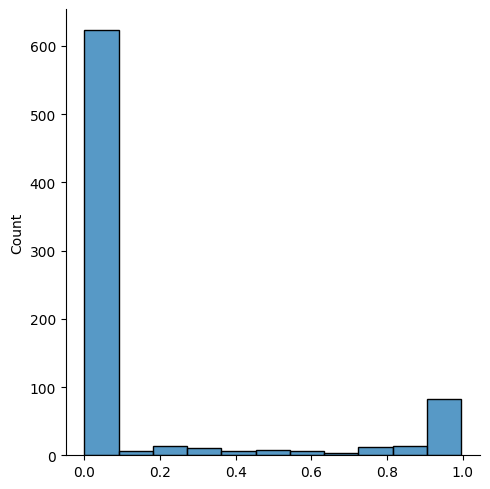

In [8]:
# D)
sns.displot(data=X_train[5000, :, :].reshape(-1), kind="hist", legend=True)

Skillnad är väl nu att det är mellan 0 och 1 nu ist för 0 - 250

# Excersise 1

In [9]:
# A), B), C), D) and F)
import keras
from keras import layers 

def MLP_model(nodes=None, names=None, activations=[]):
    model = keras.Sequential(name="MLP_model")
    # flattens the input
    model.add(layers.Flatten(input_shape=(28, 28), name="Input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(layers.Dense(node, name=name, activation=activation))

    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
                  metrics=["accuracy"])

    return model


model = MLP_model(nodes=[10], names=["Output_layer"], activations=["softmax"])
model.summary()

# model = keras.Sequential([
#     layers.Dense(512, activation="relu"),
#     layers.Dense(10, activation="softmax")
# ])

# model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


c:\Users\maxi7\Deep_Machinelearning\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(X_train, y_train, epochs=50, validation_split=1/6, verbose=1)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7910 - loss: 0.7870 - val_accuracy: 0.9161 - val_loss: 0.3121
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9108 - loss: 0.3255 - val_accuracy: 0.9239 - val_loss: 0.2819
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9138 - loss: 0.3000 - val_accuracy: 0.9250 - val_loss: 0.2703
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9220 - loss: 0.2779 - val_accuracy: 0.9283 - val_loss: 0.2637
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9233 - loss: 0.2728 - val_accuracy: 0.9280 - val_loss: 0.2614
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9252 - loss: 0.2617 - val_accuracy: 0.9298 - val_loss: 0.2582
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9252 - loss: 0.2677 - val_accuracy: 0.9294 - val_loss: 0.2608
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9278 - loss: 0.2577 - 

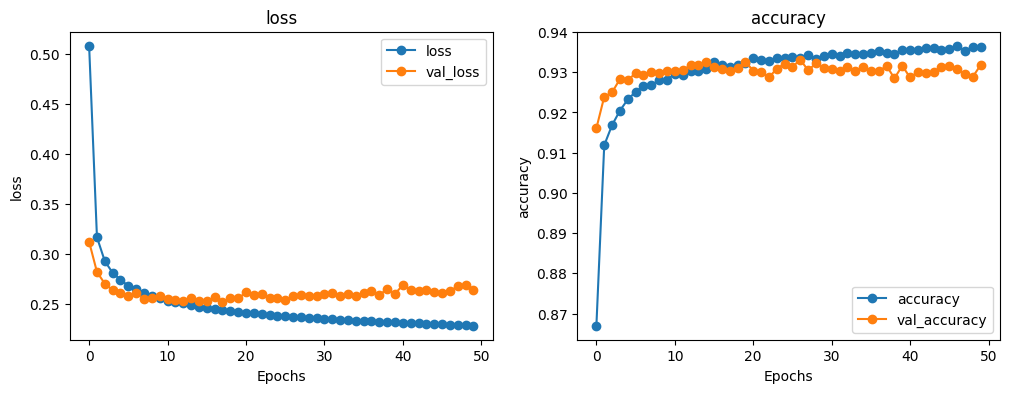

In [11]:
import pandas as pd

naive_history = pd.DataFrame(model.history.history)

def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))

    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs",
                        ylabel=metric[0],
                        title=metric[0], ax=ax, style=style)

plot_metrics(naive_history)

In [12]:
model_deep = MLP_model(nodes=[128, 128, 10], activations=["relu", "relu",
          "softmax"], names=["Hidden_1", "Hidden_2", "Output"])

model_deep.summary()

c:\Users\maxi7\Deep_Machinelearning\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_deep.fit(X_train, y_train, validation_split=1/6, verbose=0, epochs=20)

deep_history = pd.DataFrame(model_deep.history.history)

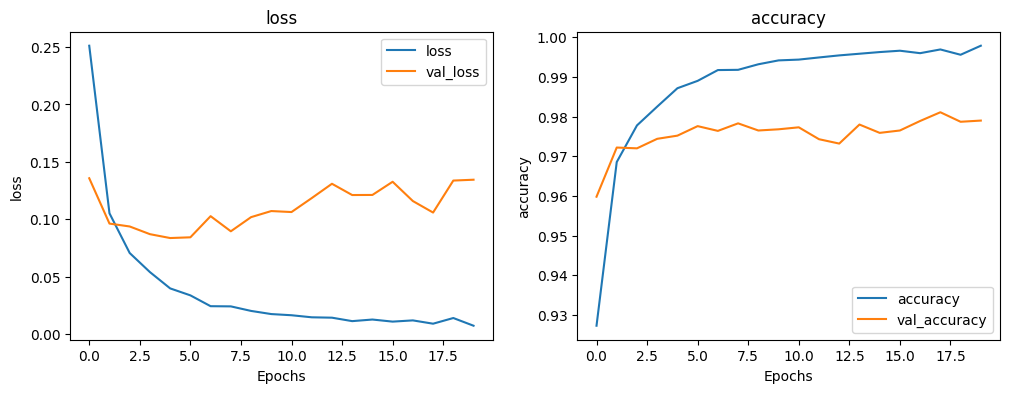

In [14]:
plot_metrics(deep_history, style = "-")
# we see validation loss increases and overfits 
# validation accuracy has stabilized, however in severe overfitting 
# the model fits to a lot of noise in training data could lead to significant
# drop in validation accuracy

### G) Model picking

Im going to choose same deep model but, decrease the number of epochs.

# Excersise 2

In [15]:
from keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model_deep.fit(X_train, y_train, epochs=25, callbacks=[early_stopper], verbose=0)

c:\Users\maxi7\Deep_Machinelearning\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



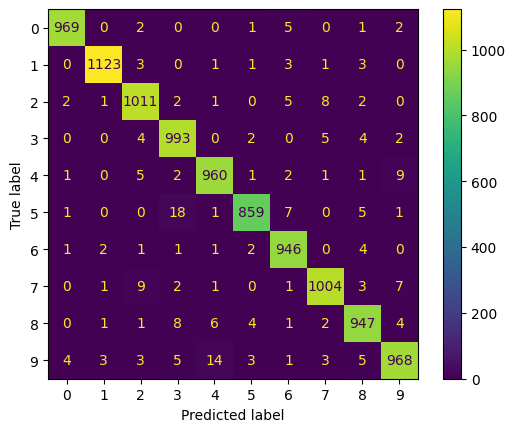

In [ ]:


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model_deep.predict(X_test)

#y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis = 1)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))

### A) so it looks like the second predicted and true label was the hardest to classify.



This could depend on a few things like:

* Data imbalence: to few training samples compared to the others.

* Poor data quality: images might have issues like noise, inconsistent labeling, or low resolution.

* Insufficient training: The model may not have trained long enough to generalize well for this class.

* Hyperparameter settings: The model architecture or training settings might not be optimized for the dataset to 100%.

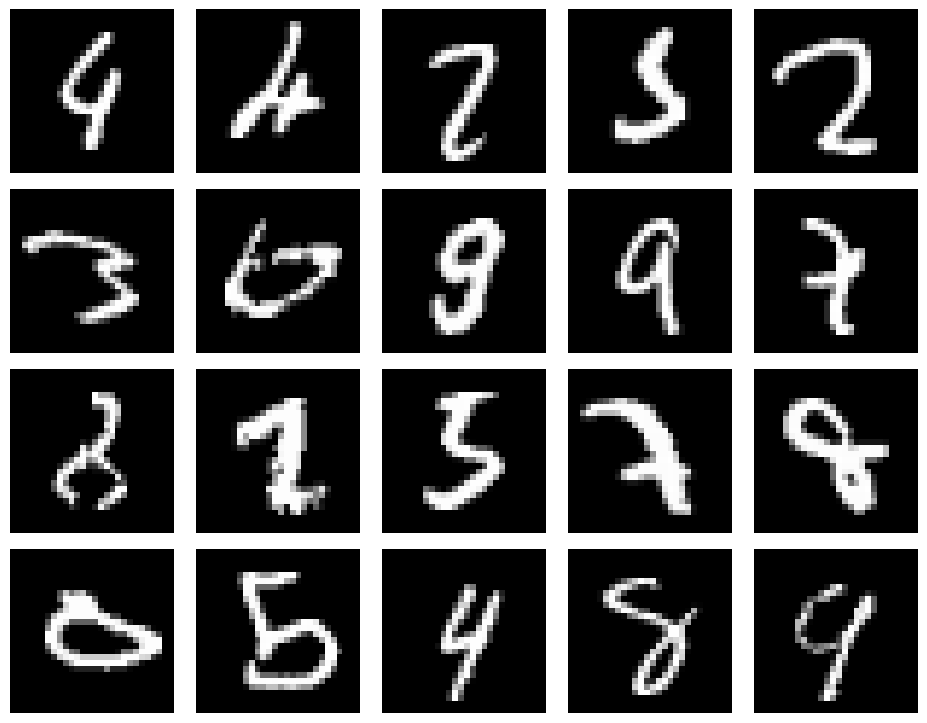

In [21]:
# B)
missclassified_indices = np.where(y_pred != y_test)[0]
missclassified_samples = X_test[missclassified_indices]

display_images(missclassified_samples, 4,5, (12,8))

In [32]:
# C)
from PIL import Image
import numpy as np
import os

# Paths
output_folder = "Missclassified"
os.makedirs(output_folder, exist_ok=True)

# Iterate through images, labels, and predictions
for i, (image, true_label, pred_label) in enumerate(zip(missclassified_samples, y_test, y_pred)):
    if true_label != pred_label:
        # Save image as a file
        image_path = os.path.join(output_folder, f"misclassified_{i}_true-{true_label}_pred-{pred_label}.png")
        Image.fromarray(np.uint8(image)).save(image_path)
